<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Train-test Split and Cross-Validation Lab

_Authors: Joseph Nelson (DC), Kiefer Katovich (SF)_

---

## Review of train/test validation methods

We've discussed overfitting, underfitting, and how to validate the "generalizeability" of your models by testing them on unseen data. 

In this lab you'll practice two related validation methods: 
1. **train/test split**
2. **k-fold cross-validation**

Train/test split and k-fold cross-validation both serve two useful purposes:
- We prevent overfitting by not using all the data, and
- We retain some remaining data to evaluate our model.

In the case of cross-validation, the model fitting and evaluation is performed multiple times on different train/test splits of the data.

Ultimately we can the training and testing validation framework to compare multiple models on the same dataset. This could be comparisons of two linear models, or of completely different models on the same data.


## Instructions

For your independent practice, fit **three different models** on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model that you like. 

**Start with train/test split validation:**
* Fix a testing/training split of the data
* Train each of your models on the training data
* Evaluate each of the models on the test data
* Rank the models by how well they score on the testing data set.

**Then try K-Fold cross-validation:**
* Perform a k-fold cross validation and use the cross-validation scores to compare your models. Did this change your rankings?
* Try a few different K-splits of the data for the same models.

If you're interested, try a variety of response variables.  We start with **MEDV** (the `.target` attribute from the dataset load method).

In [1]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')


In [2]:
import pandas as pd
import numpy as np
boston = pd.read_csv("../datasets/boston_data.csv")

X = boston.drop(columns = 'MEDV')
y = boston['MEDV']

### 1. Clean up any data problems

Load the Boston housing data.  Fix any problems, if applicable.

In [3]:
# This is a clean data set so not further cleaning required

### 2. Select 3-4 variables with your dataset to perform a 50/50 test train split on

- Use sklearn.
- Score and plot your predictions.

In [4]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [5]:
from sklearn.model_selection import train_test_split

predictors = ['CRIM', u'RM', 'B', 'LSTAT']

X_train, X_test, y_train, y_test = train_test_split(X[predictors], y, train_size=0.5, random_state=8)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

lr.score(X_test, y_test)


0.6636463203503168

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


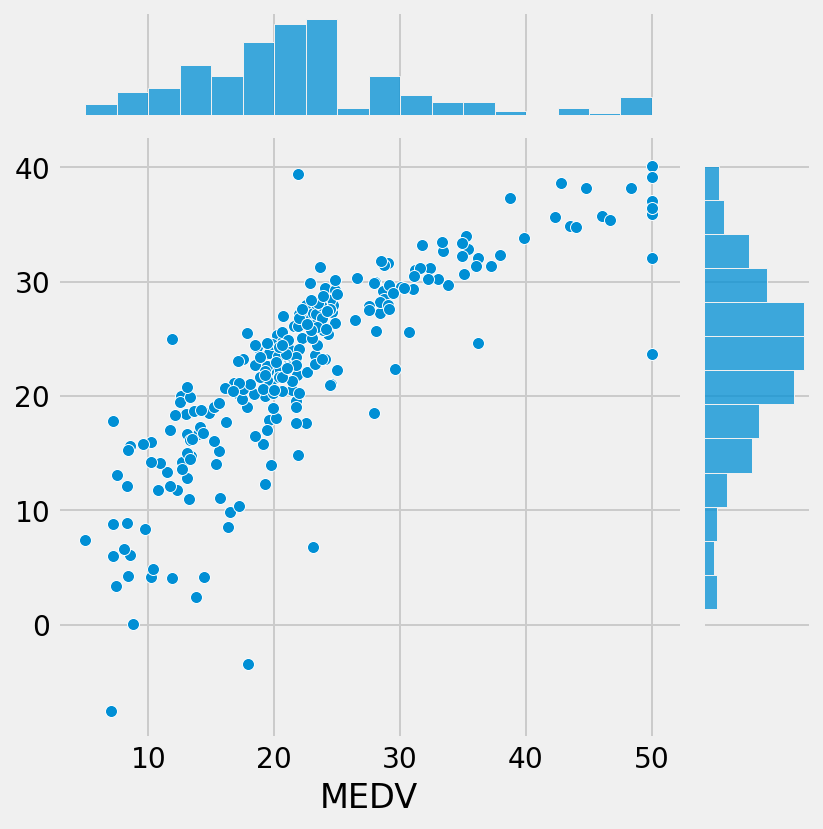

In [6]:
yhat = lr.predict(X_test)
sns.jointplot(y_test, yhat)

### 3. Try 70/30 and 90/10
- Score and plot.  
- How do your metrics change?

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[predictors], y, train_size=0.7, random_state=8)

from sklearn.linear_model import LinearRegression
lr2 = LinearRegression()

lr2.fit(X_train,y_train)

lr2.score(X_test, y_test)

0.6162784690754455

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


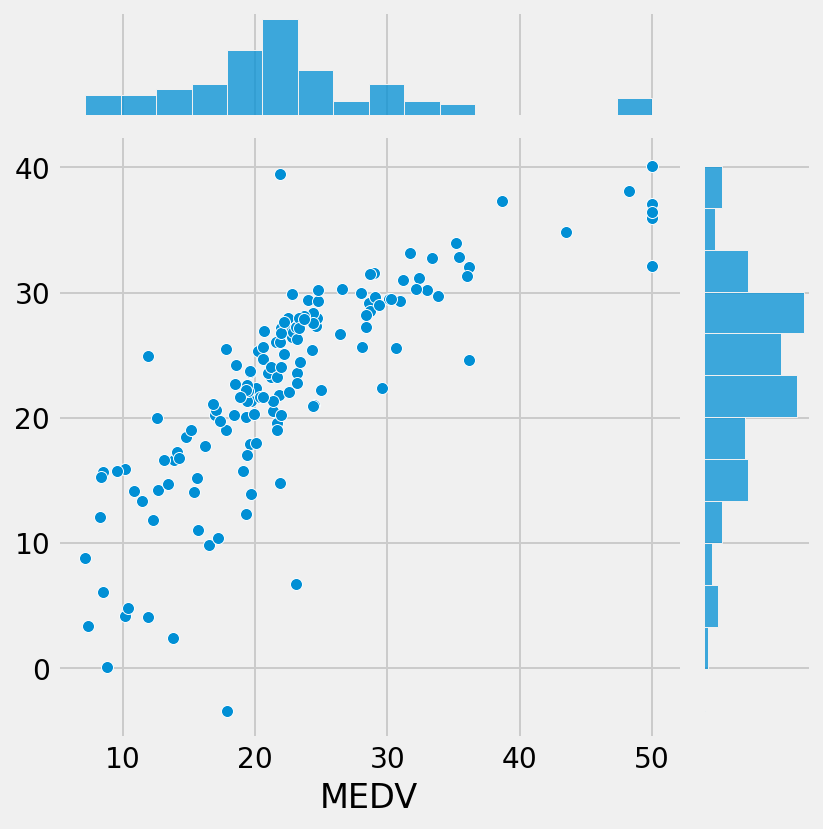

In [8]:
yhat = lr.predict(X_test)
sns.jointplot(y_test, yhat)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[predictors], y, train_size=0.9, random_state=8)

from sklearn.linear_model import LinearRegression
lr2 = LinearRegression()

lr2.fit(X_train,y_train)

lr2.score(X_test, y_test)

0.5837369556472736

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


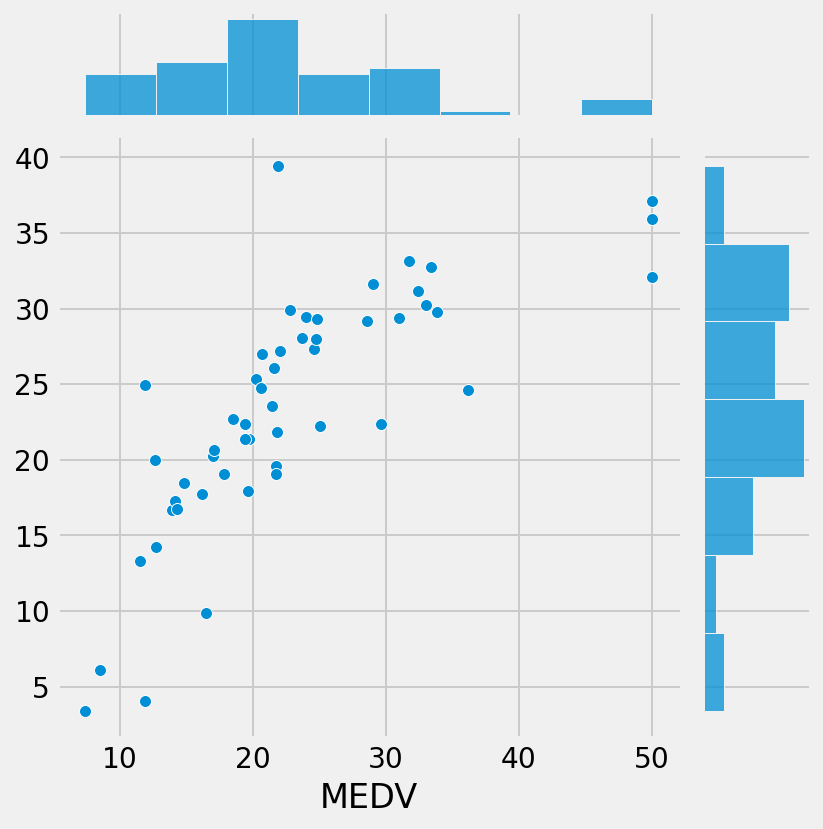

In [10]:
yhat = lr.predict(X_test)
sns.jointplot(y_test, yhat)

### 4. Try K-Folds cross-validation with K between 5-10 for your regression. 

- What seems optimal? 
- How do your scores change?  
- What the variance of scores like?
- Try different folds to get a sense of how this impacts your score.

In [11]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# iterate through folds 5-10
for folds in range(5,11):
    print ('------------------------------------\n')
    print ('K:', folds)
    model = LinearRegression()
    
    # Perform cross-validation
    scores = cross_val_score(model, X[predictors], y, cv=folds)
    print ("Cross-validated scores:", scores)
    print ("Mean CV R2:", np.mean(scores))
    print ('Std CV R2:', np.std(scores))
    
    # Make cross-validated predictions
    predictions = cross_val_predict(model, X[predictors], y, cv=folds)
    
    r2 = metrics.r2_score(y, predictions)
    print ("Cross-Predicted R2:", r2)


------------------------------------

K: 5
Cross-validated scores: [ 0.64643662  0.70494178  0.44154394  0.08682092 -0.49941486]
Mean CV R2: 0.2760656794677776
Std CV R2: 0.4439991101023877
Cross-Predicted R2: 0.5179358218718029
------------------------------------

K: 6
Cross-validated scores: [ 0.60629456  0.70763272  0.52029859  0.61899961 -0.33584065 -0.21629338]
Mean CV R2: 0.3168485760705581
Std CV R2: 0.4241505172479733
Cross-Predicted R2: 0.4759342853373204
------------------------------------

K: 7
Cross-validated scores: [ 0.65523009  0.59556838  0.5358105   0.49507761  0.24551663 -0.69093403
  0.11913605]
Mean CV R2: 0.2793436035323424
Std CV R2: 0.43455307311536034
Cross-Predicted R2: 0.42377864016868805
------------------------------------

K: 8
Cross-validated scores: [ 0.67248867  0.61782209  0.68506083  0.61035927  0.58782058 -0.28495311
 -1.03064528  0.03693312]
Mean CV R2: 0.23686076994423377
Std CV R2: 0.5828049393173571
Cross-Predicted R2: 0.5821905733958439
-------

### 5. [Bonus] optimize the $R^2$ score

Can you optimize your R^2 by selecting the best features and validating the model using either train/test split or K-Folds?

Your code will need to iterate through the different combinations of predictors, cross-validate the current model parameterization, and determine which set of features performed best.

The number of K-folds is up to you.

> *Hint:* the `itertools` package is useful for combinations and permutations.


In [12]:
from itertools import combinations

In [13]:
combs = []
for i in range(1, len(X.columns)+1):
    for c in combinations(X.columns.tolist(), i):
        combs.append(c)

In [14]:
combs

[('CRIM',),
 ('ZN',),
 ('INDUS',),
 ('CHAS',),
 ('NOX',),
 ('RM',),
 ('AGE',),
 ('DIS',),
 ('RAD',),
 ('TAX',),
 ('PTRATIO',),
 ('B',),
 ('LSTAT',),
 ('CRIM', 'ZN'),
 ('CRIM', 'INDUS'),
 ('CRIM', 'CHAS'),
 ('CRIM', 'NOX'),
 ('CRIM', 'RM'),
 ('CRIM', 'AGE'),
 ('CRIM', 'DIS'),
 ('CRIM', 'RAD'),
 ('CRIM', 'TAX'),
 ('CRIM', 'PTRATIO'),
 ('CRIM', 'B'),
 ('CRIM', 'LSTAT'),
 ('ZN', 'INDUS'),
 ('ZN', 'CHAS'),
 ('ZN', 'NOX'),
 ('ZN', 'RM'),
 ('ZN', 'AGE'),
 ('ZN', 'DIS'),
 ('ZN', 'RAD'),
 ('ZN', 'TAX'),
 ('ZN', 'PTRATIO'),
 ('ZN', 'B'),
 ('ZN', 'LSTAT'),
 ('INDUS', 'CHAS'),
 ('INDUS', 'NOX'),
 ('INDUS', 'RM'),
 ('INDUS', 'AGE'),
 ('INDUS', 'DIS'),
 ('INDUS', 'RAD'),
 ('INDUS', 'TAX'),
 ('INDUS', 'PTRATIO'),
 ('INDUS', 'B'),
 ('INDUS', 'LSTAT'),
 ('CHAS', 'NOX'),
 ('CHAS', 'RM'),
 ('CHAS', 'AGE'),
 ('CHAS', 'DIS'),
 ('CHAS', 'RAD'),
 ('CHAS', 'TAX'),
 ('CHAS', 'PTRATIO'),
 ('CHAS', 'B'),
 ('CHAS', 'LSTAT'),
 ('NOX', 'RM'),
 ('NOX', 'AGE'),
 ('NOX', 'DIS'),
 ('NOX', 'RAD'),
 ('NOX', 'TAX'),
 ('NO

In [15]:
R2_results = {}
linreg = LinearRegression()
for i,c in enumerate(combs):
    if (i % 250) == 0:
        print (i)
    subX = X[list(c)]
    R2_results[c] = np.mean(cross_val_score(linreg, subX, y))

0
250
500
750
1000
1250
1500
1750
2000
2250
2500
2750
3000
3250
3500
3750
4000
4250
4500
4750
5000
5250
5500
5750
6000
6250
6500
6750
7000
7250
7500
7750
8000


In [16]:
results = R2_results.items()
results = sorted(results, key=lambda x: x[1], reverse=True)

In [17]:
for i in range(5):
    print (results[i])

(('CRIM', 'ZN', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'), 0.5052751616354451)
(('CRIM', 'ZN', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'), 0.5046498339504792)
(('CRIM', 'ZN', 'CHAS', 'NOX', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'), 0.5042051050366243)
(('CRIM', 'ZN', 'NOX', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'), 0.5029314837238006)
(('CRIM', 'ZN', 'INDUS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'), 0.4948565952408982)


### 5.1 Can you explain what could be wrong with this approach?

In [18]:
# Even though we are cross-validating to get our R2 score for each model we're testing, 
# we're trying thousands of different models and then choosing the one that has the
# absolute highest R2.
# Cross-validation does not eliminate the fact that this is a random sample from an
# overall population, and the highest R2 out of these models is likely going to be 
# higher than the ones near it by chance. Is the model with the best R2 *REALLY* 
# better than the 2nd highest? 3rd highest?

# This is an important point: you are the researcher and you should, whenever possible,
# NOT rely on the computer's "brute force". This is why EDA is so important as well
# as domain knowledge. As a human being can we eliminate variables that we know 
# should not be used to build the model?

### 6. [Bonus] Explore another target variable and practice `patsy` formulas

Can you find another response variable, given a combination of predictors, that can be predicted accurately through the exploration of different predictors in this dataset?

**Try out using patsy to construct your target and predictor matrices from formula strings.**

> *Tip: Check out pairplots, coefficients, and pearson scores.*

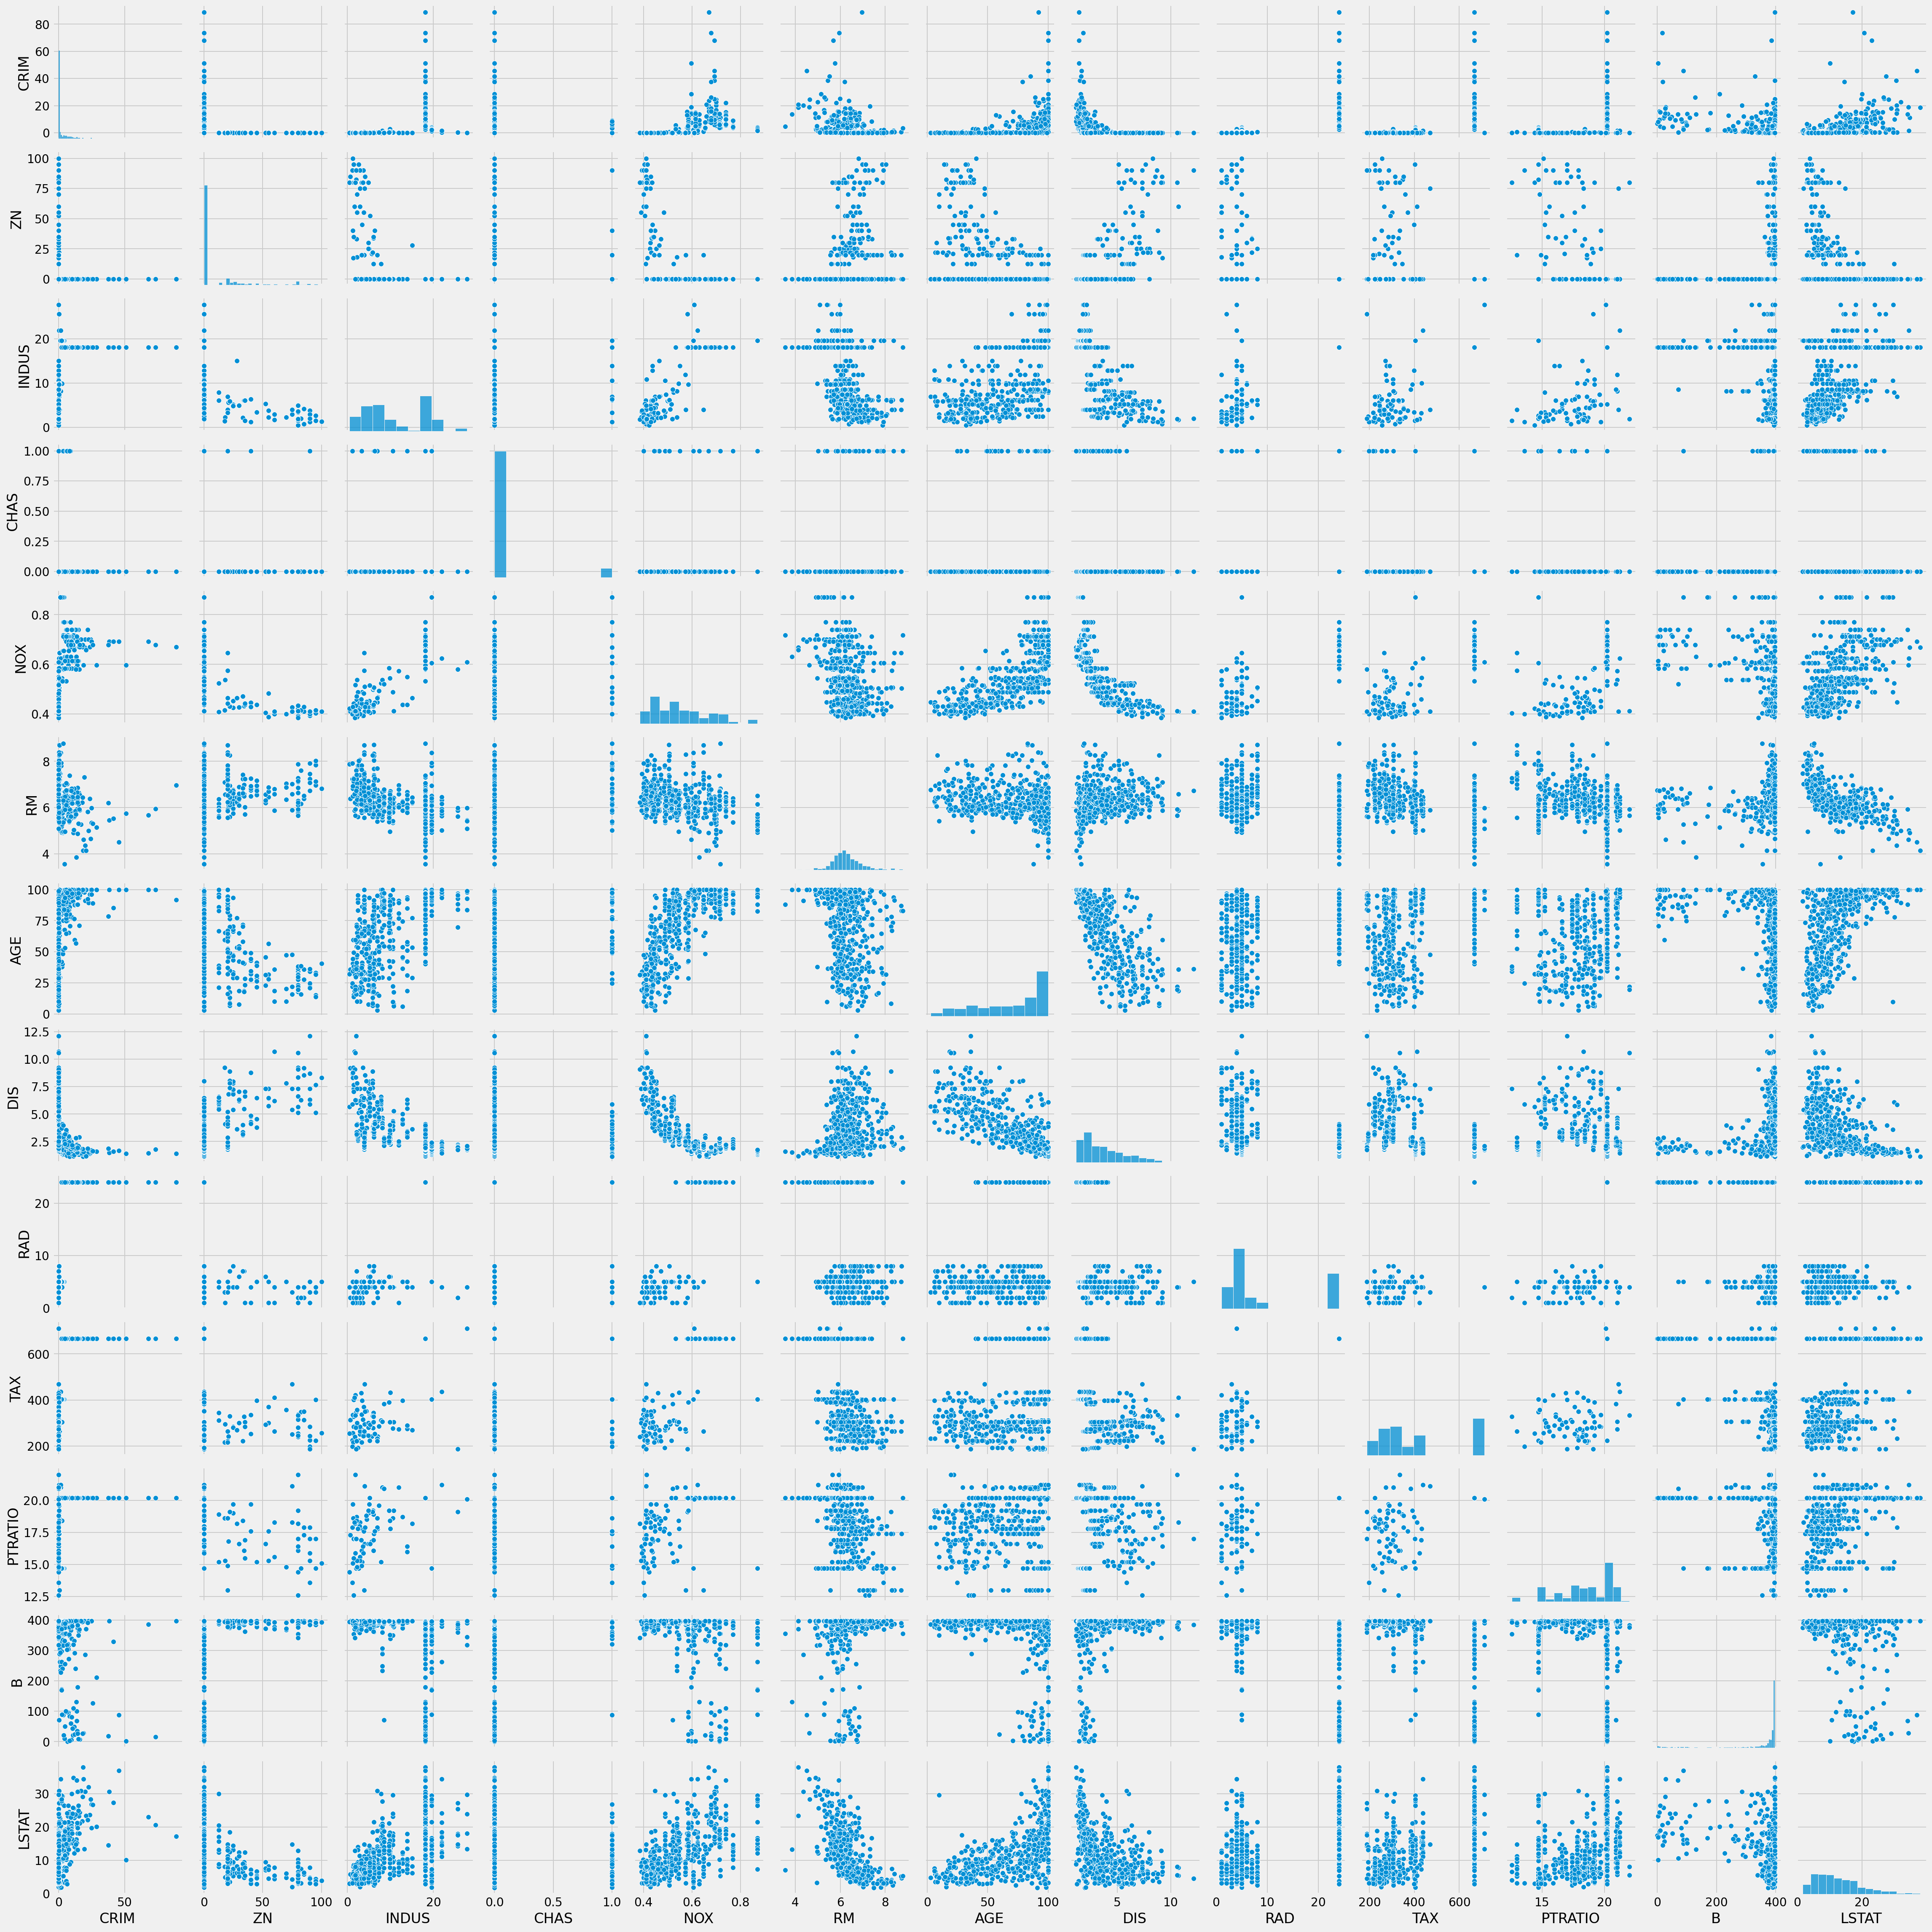

In [19]:
# Check out variable relations
import seaborn as sns
sns.pairplot(X)

In [20]:
import patsy

df = X.copy()

# Add response to core DataFrame
df['MEDV'] = y

In [21]:
# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("LSTAT ~ AGE + RM + MEDV", data=df, return_type="dataframe")

# "unravel" y
y = y.values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


In [22]:
# Build a new model and calculate the score:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print ("R^2 Score: ", metrics.r2_score(y_test, predictions))

R^2 Score:  0.6428160888004322
